In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import pickle

In [18]:
folder0 = 'output/TestL0LO_G=6.00L=0.500MG=1.60screen=0.060/'
folder1 = 'output/TestL1LO_G=6.00L=0.500MG=1.60screen=0.060/'

In [19]:
erange = loadtxt('output/TestL0LO_G=6.00L=0.500MG=1.60screen=0.060/erange_T=0.200.dat')
qrange = loadtxt('output/TestL0LO_G=6.00L=0.500MG=1.60screen=0.060/qrange_T=0.200.dat')

In [20]:
Trange = [0.2, 0.3, 0.4]

In [21]:
import matplotlib
matplotlib.style.use('publication23')

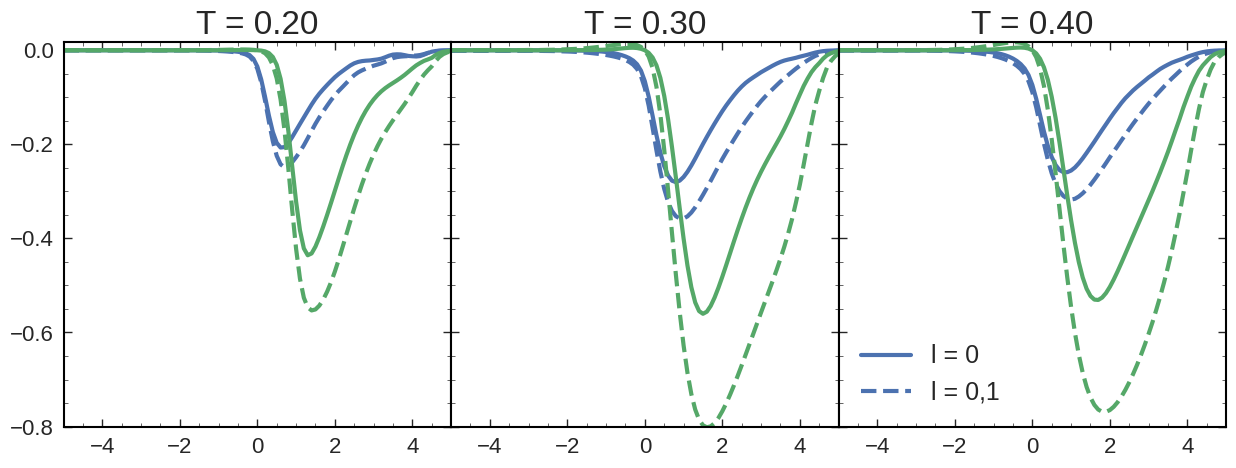

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey='all')


for T, _ax in zip(Trange, ax):
    SQ0 = np.loadtxt(folder0 + 'Q_S_T=%.3f.dat'%T, dtype=complex)
    SQ1 = np.loadtxt(folder1 + 'Q_S_T=%.3f.dat'%T, dtype=complex)

    SG0 = np.loadtxt(folder0 + 'G_S_T=%.3f.dat'%T, dtype=complex)
    SG1 = np.loadtxt(folder1 + 'G_S_T=%.3f.dat'%T, dtype=complex)
    
    l, = _ax.plot(erange, imag(SQ0[:, 0]))
    l1, = _ax.plot(erange, imag(SQ1[:, 0]), ls='--', c=l.get_c())

    lg, = _ax.plot(erange, imag(SG0[:, 0]))
    _ax.plot(erange, imag(SG1[:, 0]), ls='--', c=lg.get_c())
    _ax.set_title('T = %.2f'%T)

plt.legend([l, l1], ['l = 0', 'l = 0,1'])
fig.subplots_adjust(wspace=0)


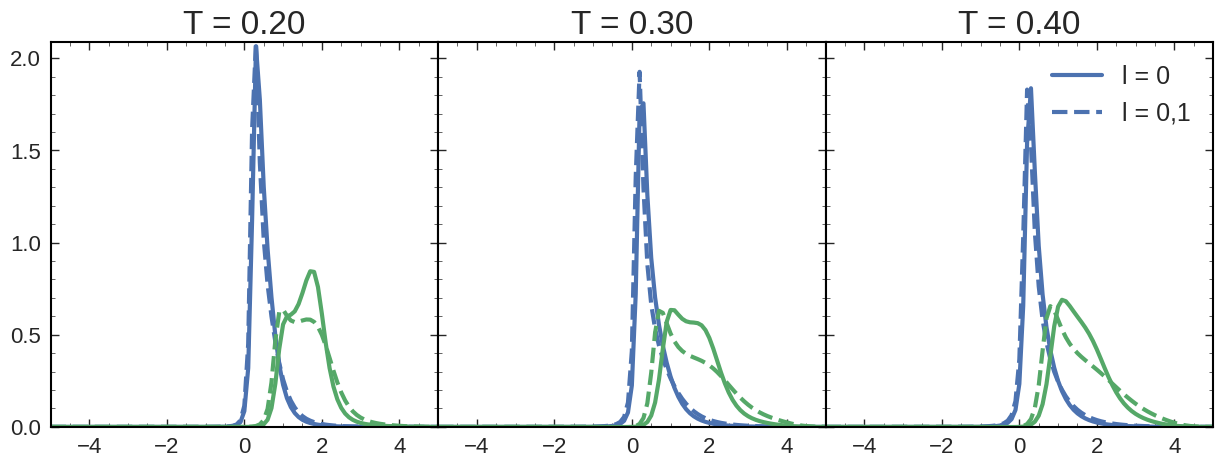

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey='all')


for T, _ax in zip(Trange, ax):
    SQ0 = np.loadtxt(folder0 + 'Q_S_T=%.3f.dat'%T, dtype=complex)
    SQ1 = np.loadtxt(folder1 + 'Q_S_T=%.3f.dat'%T, dtype=complex)

    GQ0 = -1 / (erange - 0.5 - SQ0[:, 0])/pi
    GQ1 = -1 / (erange - 0.5 - SQ1[:, 0])/pi

    SG0 = np.loadtxt(folder0 + 'G_S_T=%.3f.dat'%T, dtype=complex)
    SG1 = np.loadtxt(folder1 + 'G_S_T=%.3f.dat'%T, dtype=complex)

    GG0 = 1 / (erange - 1.6 - SG0[:, 0]) / -pi
    GG1 = 1 / (erange - 1.6 - SG1[:, 0]) / -pi

    
    l, = _ax.plot(erange, imag(GQ0))
    l1, = _ax.plot(erange, imag(GQ1), ls='--', c=l.get_c())

    lg, = _ax.plot(erange, imag(GG0))
    _ax.plot(erange, imag(GG1), ls='--', c=lg.get_c())
    _ax.set_title('T = %.2f'%T)

plt.legend([l, l1], ['l = 0', 'l = 0,1'])

fig.subplots_adjust(wspace=0)